In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [9]:
# Defino los archivos a usar
excel_conectividad = r"C:\Users\Ana-Sophia Redstone\OneDrive\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG.xlsx"
excel_coordenadas = r"C:\Users\Ana-Sophia Redstone\OneDrive\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG_3D_coordinates.xlsx"


In [10]:
# Leo los archivos de excel, como diccionarios
conectividad_dict = pd.read_excel(excel_conectividad, sheet_name=None)
coordenadas_dict = pd.read_excel(excel_coordenadas, sheet_name=None)

# Especifico cuál hoja de cada excel voy a leer, posición 0
motor_df = conectividad_dict[list(conectividad_dict.keys())[0]]
coordenadas_df = coordenadas_dict[list(coordenadas_dict.keys())[0]]

# Redefino el índice para que sea más fácil convertirlo a grafo
motor_df.set_index("Unnamed: 0", inplace=True, drop= True)
coordenadas_df.set_index("Canal", inplace=True, drop= True)


In [11]:
# Dibujemos el grafo
G = nx.from_pandas_adjacency(motor_df)

In [12]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Ana-Sophia Redstone\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
%matplotlib inline

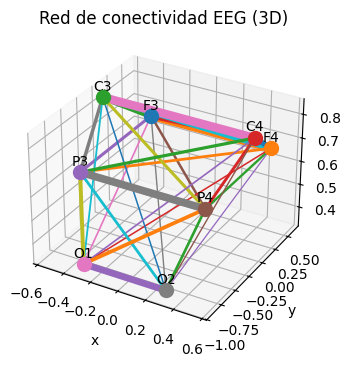

In [16]:
# %matplotlib widget

# Creamos el plot3D del grafo
pos3D = {canal: (coordenadas_df.loc[canal, 'x'],
                 coordenadas_df.loc[canal, 'y'],
                 coordenadas_df.loc[canal, 'z']) for canal in coordenadas_df.index}

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los nodos en 3d
for canal, (x, y, z) in pos3D.items():
    ax.scatter(x, y, z, s=100)
    ax.text(x, y, z+0.03, canal, fontsize=10, ha='center')

for i, j, data in G.edges(data=True):
    x = [pos3D[i][0], pos3D[j][0]]
    y = [pos3D[i][1], pos3D[j][1]]
    z = [pos3D[i][2], pos3D[j][2]]
    ax.plot(x, y, z, linewidth=data['weight']*10)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Red de conectividad EEG (3D)')
plt.show()

In [17]:
pip install seaborn

     -------------------------------------- 294.9/294.9 KB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Ana-Sophia Redstone\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


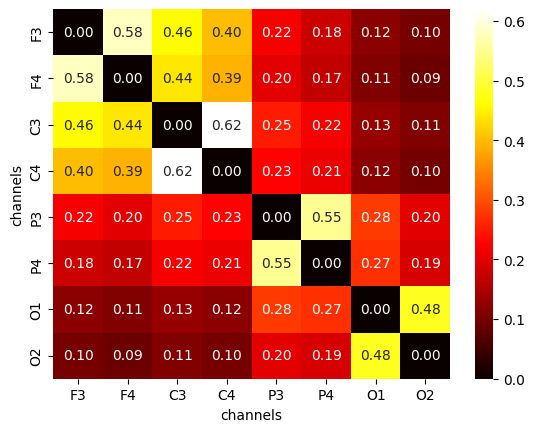

In [18]:

# Crear mapa de calor
import seaborn as sns

np.fill_diagonal(motor_df.values, 0)
ax = sns.heatmap(motor_df.values,
                 annot=True, cmap='hot', fmt=".2f",
                 xticklabels=motor_df.columns, yticklabels=motor_df.index)
ax.set(xlabel="channels", ylabel="channels")
plt.show()